# Evolve a system in a time-evolving potential

In [ ]:
import jax.numpy as jnp

import unxt as u
import galax.coordinates as gc
import galax.dynamics as gd
import galax.potential as gp

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

## Create a starting position

In [2]:
# start at the sun
w = gc.PhaseSpaceCoordinate(
    q=u.Quantity([8, 0, 0], "kpc"),
    p=u.Quantity([0, 220, 0], "km/s"),
    t=u.Quantity(0, "Myr"),
)

In [7]:
usys = u.unitsystem("kpc", "Msun", "Myr", "rad")

## Define different potentials

In [65]:
gp.NFWPotential.from_circular_velocity(v_c=u.Quantity(220, 'km/s'), r_s=u.Quantity(20, 'kpc'),
                                       r_ref=u.Quantity(8, 'kpc'), units=usys).parameters

mappingproxy({'m': ConstantParameter(Quantity['mass'](Array(1.77365921e+12, dtype=float64), unit='solMass')),
              'r_s': ConstantParameter(Quantity['length'](Array(20, dtype=int64, weak_type=True), unit='kpc'))})

In [66]:
pot = gp.NFWPotential(
    m=u.Quantity(1.77e12, "Msun"),
    r_s=u.Quantity(20, "kpc"),
    units=usys,
)

In [69]:
def mass_function(t) -> u.Quantity["mass"]:
    return u.Quantity(1.77e12, "Msun") * (1 + 10 * t.uconvert("Gyr").value)

In [70]:
tpot = gp.NFWPotential(
    m=mass_function,
    r_s=u.Quantity(20, "kpc"),
    units=usys,
)

## Integrate the orbits

In [88]:
orbit = gd.evaluate_orbit(pot, w, u.Quantity(jnp.linspace(0, 2, 10000), "Gyr"))

In [89]:
te_orbit = gd.evaluate_orbit(tpot, w, u.Quantity(jnp.linspace(0, 2, 10000), "Gyr"))

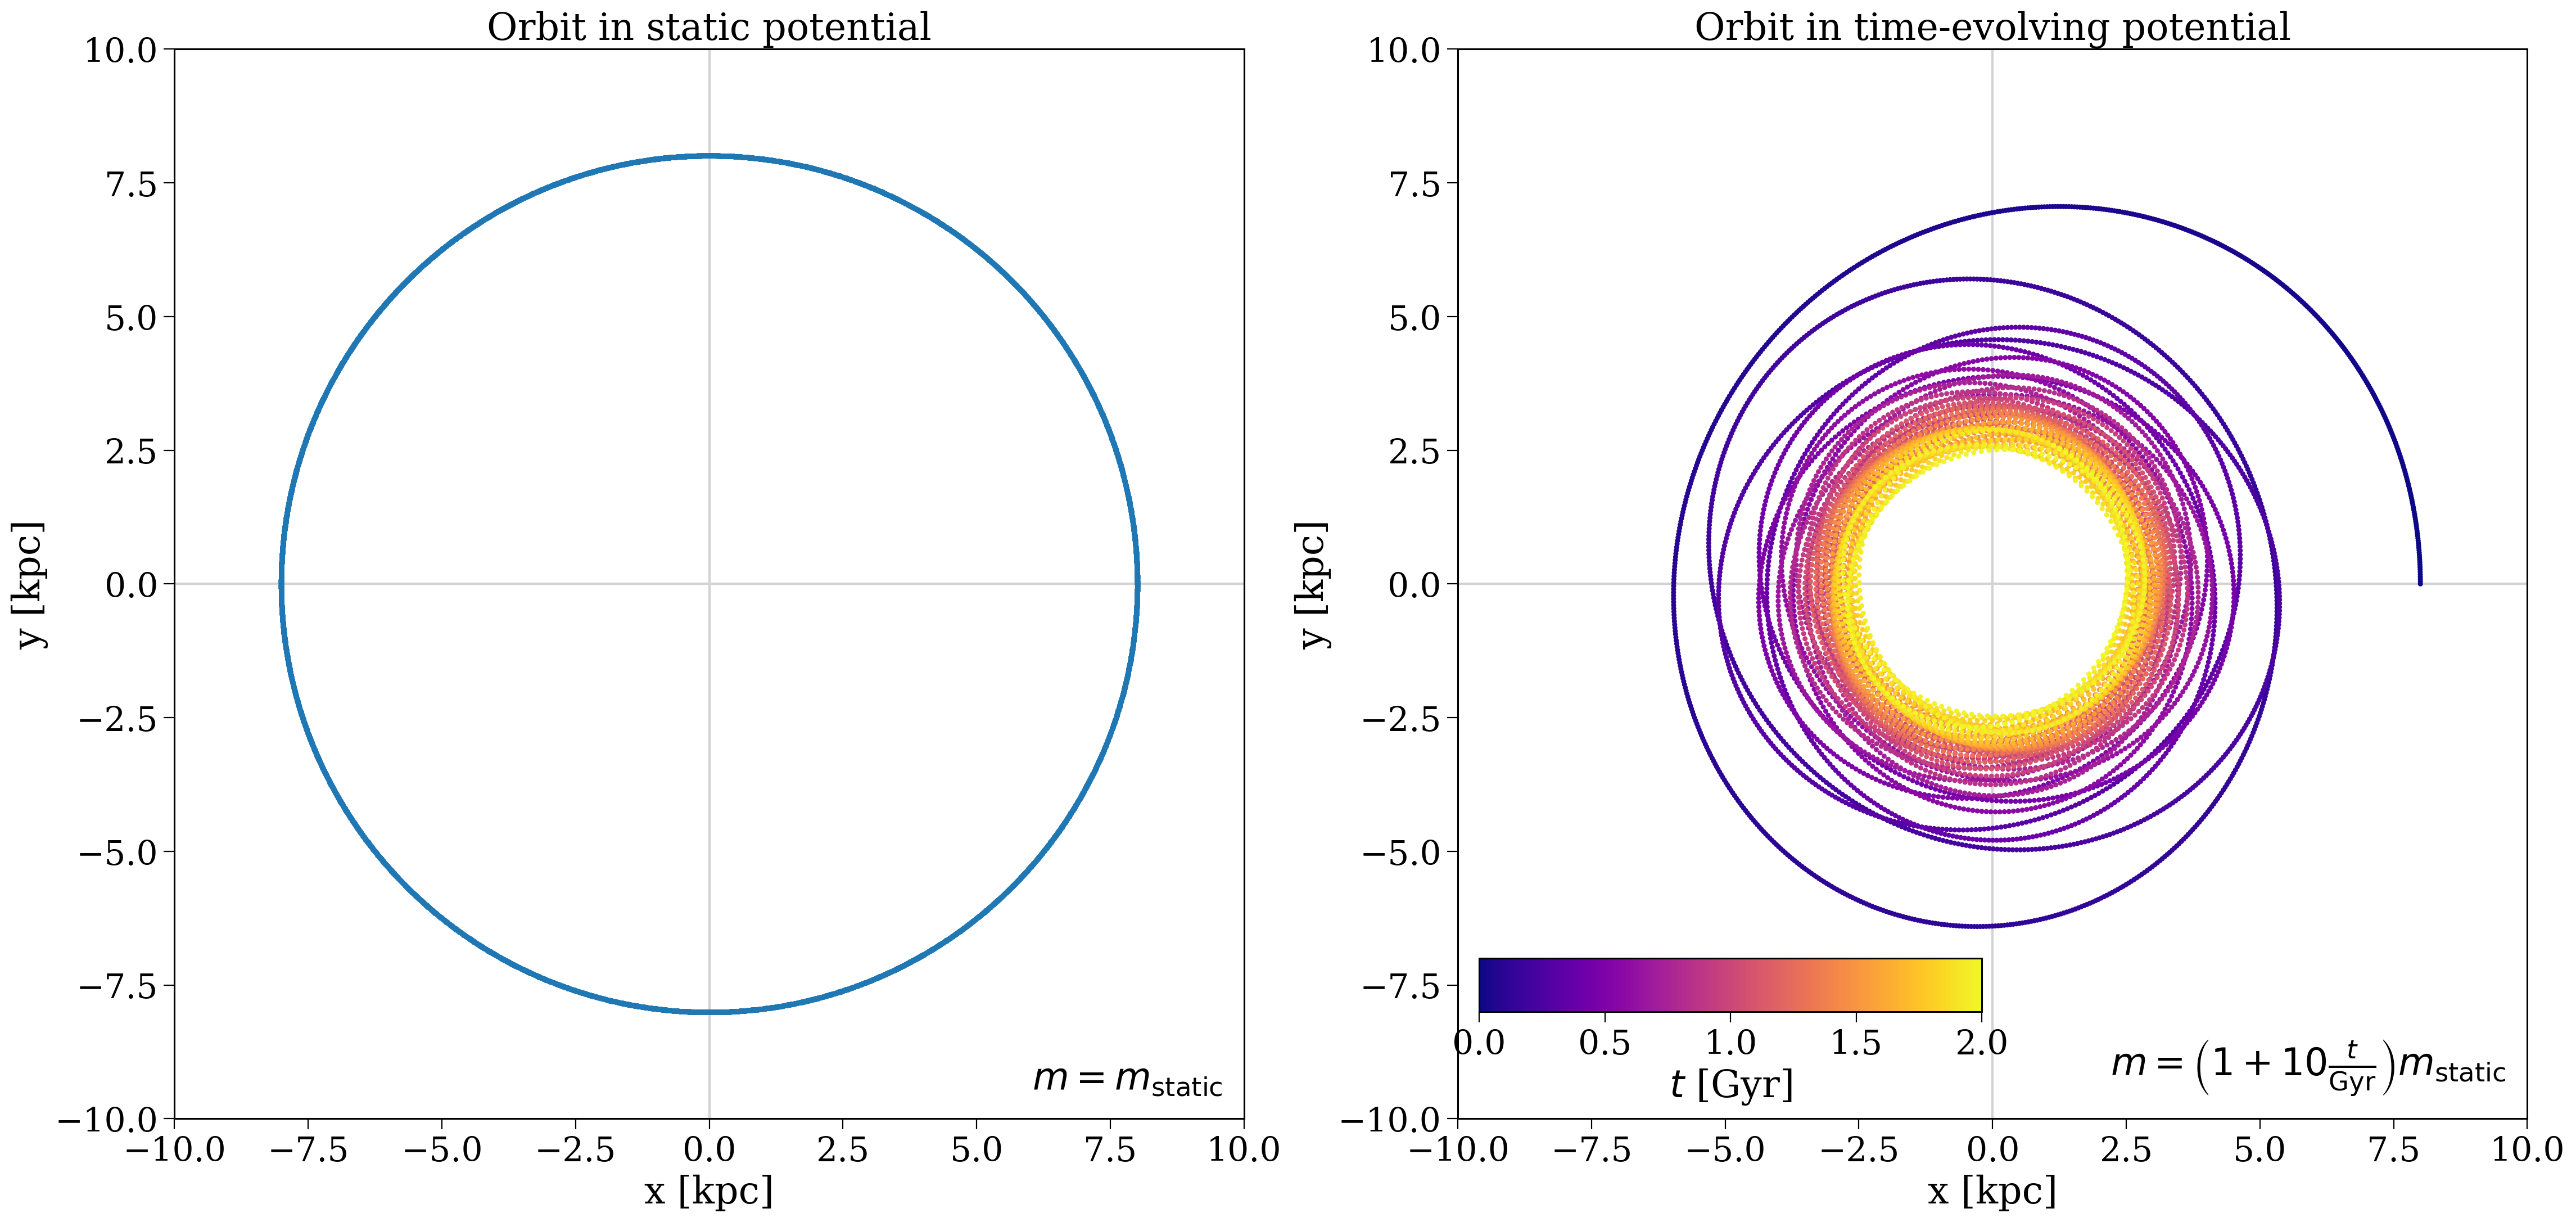

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(27, 15))

orbit.plot(x='x', y='y', ax=axes[0], plot_function='scatter', s=5)
scatter = te_orbit.plot(x='x', y='y', ax=axes[1], plot_function='scatter', c=te_orbit.t.uconvert("Gyr").value, cmap='plasma', s=5)


axes[0].set_title("Orbit in static potential", fontsize=fs)
axes[1].set_title("Orbit in time-evolving potential", fontsize=fs)

# cax = axes[1].inset_axes([0.02, 0.05, 0.05, 0.9])
# fig.colorbar(scatter.collections[-1], cax=cax, label=r"$t$ [Gyr]", orientation='vertical')

cax = axes[1].inset_axes([0.02, 0.1, 0.47, 0.05])
fig.colorbar(scatter.collections[-1], cax=cax, label=r"$t$ [Gyr]", orientation='horizontal',)

axes[0].annotate(r"$m = m_{\rm static}$",
                 xy=(0.98, 0.02), xycoords='axes fraction', fontsize=fs,
                 ha='right', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white'))

axes[1].annotate(r"$m = \left(1 + 10 \frac{t}{{\rm Gyr}}\right) m_{\rm static}$",
                 xy=(0.98, 0.02), xycoords='axes fraction', fontsize=fs,
                 ha='right', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white'))

for ax in axes:
    ax.axvline(0, color="lightgrey", zorder=-1)
    ax.axhline(0, color="lightgrey", zorder=-1)
    ax.set(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')